In [1]:
import numpy as np 
import pandas as pd 
from qutip import tensor, Qobj
from pulsee import simulation as sim 
import matplotlib.pyplot as plt


In [2]:

quantum_numbers = [1/2]
gamma_2pis = [0.50]
b_0 = 10
zeem_par = {'field magnitude': b_0, 'theta_z': 0, 'phi_z': 0}
b_1 = b_0 / 10
freq = gamma_2pis[0] * b_0
phase = 0 
polar_b = np.pi / 2
azimuthal_b = 0 
pulse_time = 2 * np.pi / (gamma_2pis[0] * b_1)

mode = pd.DataFrame([(freq,        b_1,         phase,   polar_b,   azimuthal_b)],
		    columns=['frequency', 'amplitude', 'phase', 'theta_p', 'phi_p'])

acq_time = 100 # ms 
t2 = 10

spin_par = [] 
for qn, gam in zip(quantum_numbers, gamma_2pis):
    spin_par.append({'quantum number': qn, 'gamma/2pi': gam})

args = {}
args['zeem_par'] = zeem_par
args['spin_par'] = spin_par


In [3]:
spin, h_unperturbed, _ = sim.nuclear_system_setup(**args)
initial_dm = Qobj([[1, 0], [0, 0]]) # ensemble initially in spin up 
evolved_dm = sim.evolve(spin, h_unperturbed, initial_dm, mode=mode, pulse_time=pulse_time)
np.round(evolved_dm.full(), decimals=1)


array([[ 0.+0.j, -0.-0.j],
       [-0.+0.j,  1.+0.j]])

In [4]:
t, fid = sim.FID_signal(spin, h_unperturbed, evolved_dm, acquisition_time=acq_time, T2=t2)

In [5]:
f, ft = sim.fourier_transform_signal(fid, t)

(-10.0, 10.0)

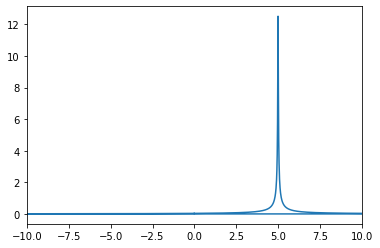

In [8]:
fig, ax = plt.subplots() 
ax.plot(f, ft)
ax.set_xlim(-10, 10)